Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

---

Для расчета коэффициентов линейной регрессии с использованием intercept (перехвата) можно использовать следующие формулы:  

![](images/with_intercept..png)  

где:

- n - количество наблюдений  
- x_i - значение независимой переменной для i-го наблюдения  
- y_i - значение зависимой переменной для i-го наблюдения  
- overline{x} - среднее значение независимой переменной  
- overline{y} - среднее значение зависимой переменной  
- beta_1 - коэффициент наклона (slope)  
- beta_0 - коэффициент перехвата (intercept)  

Коэффициент наклона (beta_1) показывает, насколько изменится зависимая переменная (y) при изменении независимой переменной (x) на единицу. 
Коэффициент перехвата (beta_0) показывает, какое значение примет зависимая переменная (y), когда независимая переменная (x) равна нулю. 


Формулы для расчета коэффициентов линейной регрессии без использования intercept (перехвата) отличаются от формул с использованием intercept только в расчете коэффициента наклона (beta_1):

![](images/without_intercept.png)

В этой формуле нет слагаемого, отвечающего за перехват, так как он не учитывается при расчете коэффициента наклона.

Остальные обозначения в этой формуле соответствуют обозначениям, приведенным в формулах для расчета коэффициентов линейной регрессии с использованием intercept.

Используя библиотеку NumPy в Python, можно рассчитать коэффициенты линейной регрессии следующим образом:


In [22]:
import numpy as np

# заданные значения зарплаты и кредитного скоринга
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

# расчет коэффициентов линейной регрессии с intercept
b_with_intercept = np.cov(zp, ks, ddof=0)[0, 1] / np.var(zp, ddof=0)
a_with_intercept = np.mean(ks) - b_with_intercept * np.mean(zp)

# расчет коэффициентов линейной регрессии без intercept
b_without_intercept = np.sum(zp * ks) / np.sum(zp ** 2)

print(f"Коэффициент наклона с intercept: {b_with_intercept: .2f}")
print(f"Коэффициент пересечения с осью y: {a_with_intercept: .2f}")

print(f"Коэффициент наклона без intercept: {b_without_intercept: .2f}")


Коэффициент наклона с intercept:  2.62
Коэффициент пересечения с осью y:  444.18
Коэффициент наклона без intercept:  5.89


Таким образом, уравнение линейной регрессии с использованием intercept имеет вид:  
`y=2.62*x+444.18`  
А уравнение линейной регрессии без intercept имеет вид:  
`y=5.89*x`  
Можно заметить, что в случае без intercept, уравнение проходит не через начало координат, что означает, что при зарплате равной нулю, кредитный скоринг тоже будет равен нулю.

Визуализируем результаты линейной регрессии:

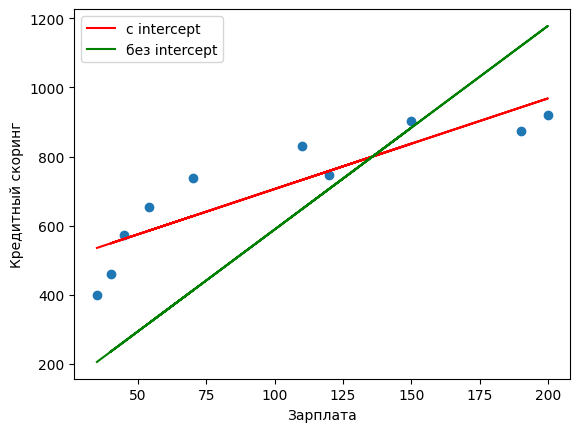

In [23]:
import matplotlib.pyplot as plt

# график рассеяния
plt.scatter(zp, ks)

# прямая с intercept
plt.plot(zp, b_with_intercept * zp + a_with_intercept,
         color='red', label='с intercept')

# прямая без intercept
plt.plot(zp, b_without_intercept * zp, color='green', label='без intercept')

plt.xlabel('Зарплата')
plt.ylabel('Кредитный скоринг')
plt.legend()
plt.show()


---
---

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

---

Для расчета коэффициента линейной регрессии без intercept с использованием градиентного спуска нам нужно минимизировать функцию ошибки MSE:  

![](images/mse.png)

где w - коэффициент линейной регрессии, x_i и y_i - значения признака и целевой переменной соответственно для i-го наблюдения, а n - количество наблюдений.

Чтобы минимизировать MSE(w), мы будем использовать градиентный спуск, который заключается в последовательном обновлении весов w по формуле:

![](images/mse_gradient.png)

где alpha - скорость обучения.

Напишем функцию, которая будет реализовывать градиентный спуск:


In [24]:
def gradient_descent(x, y, alpha=0.0001, iterations=1000):
    w = 0  # начальное значение веса
    n = len(x)  # количество наблюдений

    for i in range(iterations):
        y_pred = w * x  # предсказанные значения
        error = y - y_pred  # ошибка
        w += alpha * (1 / n) * np.sum(error * x)  # обновление веса

    return w


Теперь мы можем посчитать коэффициент линейной регрессии без intercept с помощью функции gradient_descent:

In [25]:
b_without_intercept = gradient_descent(zp, ks)

print("Коэффициент линейной регрессии без intercept:", b_without_intercept)


Коэффициент линейной регрессии без intercept: 5.889820420132689


Визуализируем результаты линейной регрессии без intercept:

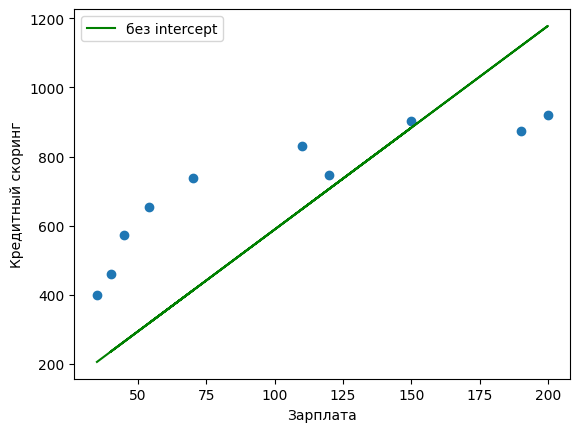

In [26]:
# график рассеяния
plt.scatter(zp, ks)

# прямая без intercept
plt.plot(zp, b_without_intercept * zp, color='green', label='без intercept')

plt.xlabel('Зарплата')
plt.ylabel('Кредитный скоринг')
plt.legend()
plt.show()


На графике можно видеть, что прямая без intercept проходит через начало координат.  
Это отличается от модели линейной регрессии с использованием intercept, которая проходит через точку (0, a).

---
---

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

---


Как видно из графика, между заработной платой и скоринговым баллом есть некоторая линейная зависимость. Мы можем использовать линейную регрессию для построения линии, которая наилучшим образом приближает эти данные.

Используем метод наименьших квадратов для определения коэффициентов линейной регрессии. Формулы для вычисления коэффициентов линейной регрессии следующие:

![](images/klregress.png)

где a- intercept (точка, где линия пересекает ось y), b - наклон линии, bar{x} и bar{y} - средние значения x и y соответственно.

In [35]:
x_mean = np.mean(zp)
y_mean = np.mean(ks)
b = np.sum((zp - x_mean) * (ks - y_mean)) / np.sum((zp - x_mean) ** 2)
a = y_mean - b * x_mean
print("Коэффициенты линейной регрессии: a = {:.2f}, b = {:.2f}".format(a, b))


Коэффициенты линейной регрессии: a = 444.18, b = 2.62


Таким образом, уравнение линейной регрессии имеет вид:

y=2.62x+444.18

Теперь мы можем построить линию регрессии на графике:

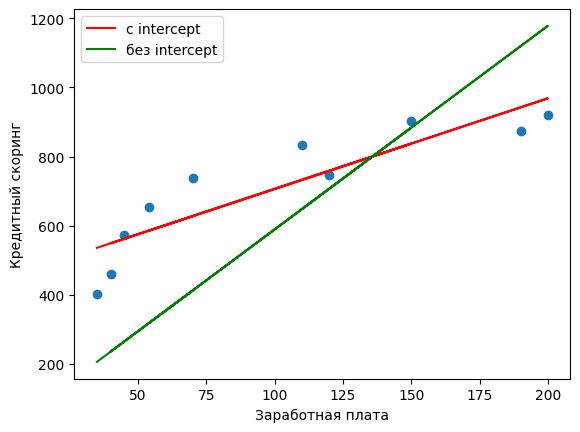

In [41]:
plt.scatter(zp, ks)
# прямая с intercept
plt.plot(zp, b * zp + a, color='red', label='c intercept')

# прямая без intercept
plt.plot(zp, b_without_intercept * zp, color='green', label='без intercept')

plt.xlabel('Заработная плата')
plt.ylabel('Кредитный скоринг')
plt.legend()
plt.show()
